# Defensive Overlay

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import skew, kurtosis

from final_deliverable.utils_final import *

# Load Data

In [80]:
# Load the first sheet of the provided Excel file
df = pd.read_excel('equity_domestic_monthly_rets.xlsx')

# Set the 'Date' column as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [81]:
df

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 37,Asset 38,Asset 39,Asset 40,Asset 41,Asset 42,Asset 43,Asset 44,Asset 45,Asset 46
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-03,0.0000,0.0000,0.0000,-0.0338,0.0000,0.0000,0.0000,-0.0137,0.0000,0.0000,...,0.0115,0.0419,0.0675,0.1113,0.0419,0.0177,-0.0411,-0.0118,-0.0171,-0.0013
2001-02-01,0.0000,0.0000,0.0000,-0.0378,0.0000,0.0000,0.0000,0.0048,0.0000,0.0000,...,0.0166,0.0215,-0.0046,0.0319,0.0253,-0.0520,-0.0496,0.0120,0.0114,0.0100
2001-03-01,0.0000,0.0000,0.0000,0.0269,0.0000,0.0000,0.0000,0.0441,0.0000,0.0000,...,-0.0172,0.0704,0.0395,-0.1746,0.0087,0.0011,0.0999,0.0110,0.0135,0.0058
2001-04-02,0.0000,0.0000,0.0000,-0.0210,0.0000,0.0000,0.0000,0.0367,0.0000,0.0000,...,-0.0038,-0.0238,-0.0028,-0.1542,-0.0019,-0.0201,0.0181,0.0008,-0.0176,0.0081
2001-05-01,0.0000,0.0000,0.0000,0.0414,0.0000,0.0000,0.0000,0.0314,0.0000,0.0000,...,0.0053,0.1430,0.0607,0.2815,0.0649,0.0244,0.0337,-0.0122,-0.0239,0.0032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,-0.0672,-0.0762,-0.0498,-0.0160,-0.0570,-0.0474,0.0096,-0.0149,-0.0978,-0.0203,...,-0.0728,-0.0724,-0.1059,-0.0831,-0.0480,-0.0287,0.0441,-0.0186,-0.0398,-0.0003
2024-06-03,0.0726,0.0105,0.0971,0.0548,0.0147,0.0757,0.0090,0.0565,-0.0070,-0.0625,...,0.0137,0.0037,0.0567,0.1348,0.0015,-0.0282,0.0741,0.0206,0.0378,0.0063
2024-07-01,-0.0249,-0.0829,-0.0115,0.0312,0.0068,0.0321,-0.0595,-0.0115,-0.1055,-0.0501,...,0.0166,0.0102,-0.0685,-0.0050,-0.0899,0.0122,-0.0617,-0.0019,-0.0153,0.0034


# Calculate Maximum Drawdown on data

In [82]:
pred_binary = pd.read_excel('equity_domesitc_predictions.xlsx')
date_shifted = pred_binary['Date'].shift(-1)
pred_binary_shifted = pred_binary.copy()
pred_binary_shifted['Date'] = date_shifted
pred_binary_shifted

,Date,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,...,Asset 37,Asset 38,Asset 39,Asset 40,Asset 41,Asset 42,Asset 43,Asset 44,Asset 45,Asset 46
0,2004-07-01,NaN,NaN,NaN,0,0,0,0,1,0,...,1,1,1,0,1,1,0,1,1,1
1,2004-08-02,NaN,NaN,NaN,1,0,0,0,0,0,...,1,1,0,1,0,1,1,1,0,1
2,2004-09-01,NaN,NaN,NaN,1,0,0,0,1,0,...,1,1,1,0,1,0,1,1,1,1
3,2004-10-01,NaN,NaN,NaN,1,0,0,0,0,0,...,1,1,1,0,0,1,1,1,1,1
4,2004-11-01,NaN,NaN,NaN,0,0,0,0,1,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2024-05-01,1.0000,1.0000,1.0000,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
239,2024-06-03,1.0000,1.0000,1.0000,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
240,2024-07-01,1.0000,1.0000,1.0000,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
241,2024-08-01,1.0000,1.0000,1.0000,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [83]:
pred_binary_shifted = pred_binary_shifted.set_index("Date")

common_dates = df.index.intersection(pred_binary_shifted.index)
pred_binary_shifted = pred_binary_shifted.loc[common_dates]

for col in pred_binary_shifted.columns:
    if col in df.columns:
        pred_binary_shifted[col] = pred_binary_shifted[col].where(pred_binary_shifted[col] != 1, df[col])

pred_binary_shifted

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 37,Asset 38,Asset 39,Asset 40,Asset 41,Asset 42,Asset 43,Asset 44,Asset 45,Asset 46
Date,,,,,,,,,,,,,,,,,,,,,
2004-07-01,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0255,0.0000,0.0000,...,-0.0031,0.1490,0.0575,0.0000,0.0207,0.0467,0.0000,0.0136,0.0218,0.0014
2004-08-02,NaN,NaN,NaN,0.0235,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,-0.0108,-0.0294,0.0000,-0.1089,0.0000,0.0246,0.0199,0.0119,0.0000,0.0033
2004-09-01,NaN,NaN,NaN,-0.0362,0.0000,0.0000,0.0000,0.0279,0.0000,0.0000,...,0.0376,-0.0094,0.0098,0.0000,0.0134,0.0000,0.0307,0.0264,0.0414,0.0069
2004-10-01,NaN,NaN,NaN,0.0400,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0035,-0.0022,0.0517,0.0000,0.0000,0.0273,-0.0152,-0.0006,0.0034,-0.0019
2004-11-01,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,-0.0142,0.0000,0.0000,...,0.0128,0.0195,0.0789,-0.0181,-0.0341,0.0590,0.0590,0.0090,0.0164,0.0030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,0.0712,0.0191,0.0411,0.0074,0.0443,0.0042,0.0411,0.0561,-0.0133,0.0044,...,0.0140,-0.0595,0.0390,0.0300,0.0565,-0.0033,0.1345,-0.0063,-0.0170,-0.0006
2024-05-01,-0.0672,-0.0762,-0.0498,-0.0160,-0.0570,-0.0474,0.0096,-0.0149,-0.0978,-0.0203,...,-0.0728,-0.0724,-0.1059,-0.0831,-0.0480,-0.0287,0.0441,-0.0186,-0.0398,-0.0003
2024-06-03,0.0726,0.0105,0.0971,0.0548,0.0147,0.0757,0.0090,0.0565,-0.0070,-0.0625,...,0.0137,0.0037,0.0567,0.1348,0.0015,-0.0282,0.0741,0.0206,0.0378,0.0063


In [84]:
# Calculate cumulative returns
cumulative_returns = (1 + pred_binary_shifted).cumprod()

# Calculate rolling maximum
rolling_max = cumulative_returns.cummax()

# Calculate drawdown
drawdown = (cumulative_returns - rolling_max) / rolling_max

# Identify drawdown periods (boolean mask)
drawdown_periods = drawdown < -0.05  # Threshold: 5% drawdown

In [85]:
drawdown_periods

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 37,Asset 38,Asset 39,Asset 40,Asset 41,Asset 42,Asset 43,Asset 44,Asset 45,Asset 46
Date,,,,,,,,,,,,,,,,,,,,,
2004-07-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-08-02,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2004-09-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2004-10-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2004-11-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,False,True,False,False,False,True,False,False,False,False,...,False,True,True,False,True,True,False,True,True,False
2024-05-01,True,True,True,False,True,True,False,False,True,False,...,True,True,True,True,True,True,False,True,True,False
2024-06-03,False,True,False,False,True,True,False,False,True,True,...,True,True,True,False,True,True,False,True,True,False


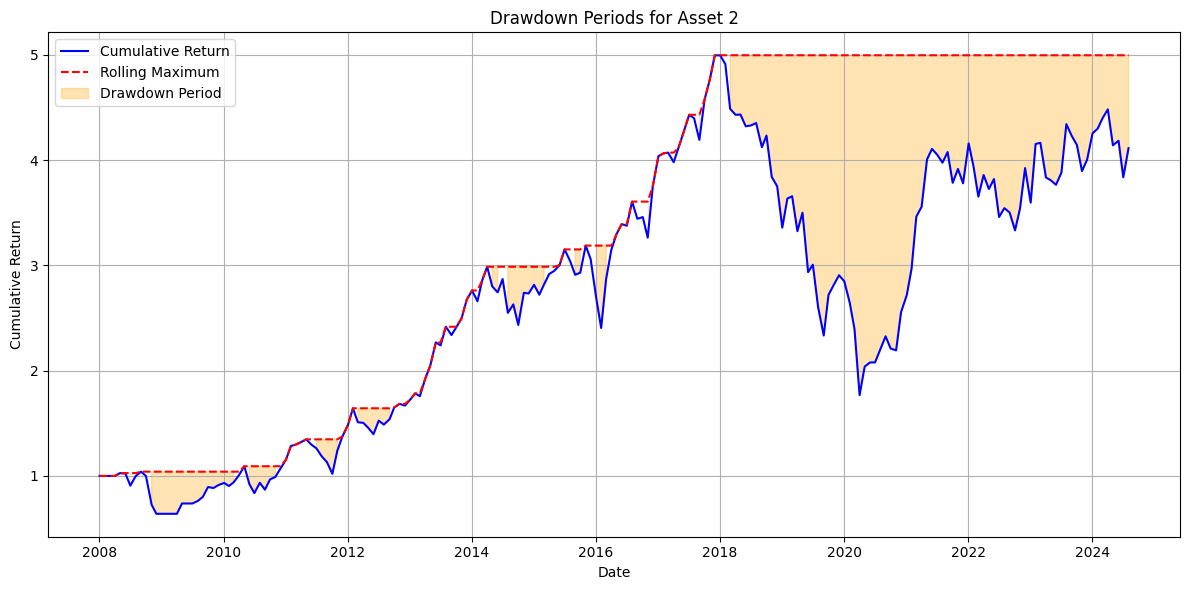

In [86]:
# Plot cumulative returns and drawdown for one asset (e.g., 'Asset1')
asset = 'Asset 2'

plt.figure(figsize=(12, 6))

# Plot cumulative returns and rolling maximum
plt.plot(cumulative_returns[asset], label="Cumulative Return", color="blue")
plt.plot(rolling_max[asset], label="Rolling Maximum", color="red", linestyle="--")

# Highlight drawdown periods
plt.fill_between(
    drawdown.index,
    cumulative_returns[asset],
    rolling_max[asset],
    where=drawdown_periods[asset],
    color="orange",
    alpha=0.3,
    label="Drawdown Period"
)

plt.title(f"Drawdown Periods for {asset}")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Generate risk signals

In [87]:
# Sample data
portfolio_weights = pd.read_excel('classification_equity_domestic_Sharpe_weight.xlsx')
dates = portfolio_weights['Date'].values

portfolio_weights = portfolio_weights.set_index('Date')

# Skewness/ Vol/ VAR (expanding/rolling window)
# Compare different metrics' results


In [88]:
portfolio_weights

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 37,Asset 38,Asset 39,Asset 40,Asset 41,Asset 42,Asset 43,Asset 44,Asset 45,Asset 46
Date,,,,,,,,,,,,,,,,,,,,,
2005-06-01,0.0000,0.0000,0.0000,0.0465,0.0000,0.0000,0.0000,0.0501,0.0000,0.0000,...,0.0407,0.0613,0.0434,0.0548,0.0364,0.0447,0.0427,0.0358,0.0414,0.0330
2005-07-01,0.0000,0.0000,0.0000,0.0446,0.0000,0.0000,0.0000,0.0506,0.0000,0.0000,...,0.0458,0.0542,0.0436,0.0513,0.0326,0.0479,0.0498,0.0360,0.0419,0.0339
2005-08-01,0.0000,0.0000,0.0000,0.0462,0.0000,0.0000,0.0000,0.0529,0.0000,0.0000,...,0.0480,0.0542,0.0446,0.0605,0.0380,0.0490,0.0480,0.0344,0.0391,0.0337
2005-09-01,0.0000,0.0000,0.0000,0.0448,0.0000,0.0000,0.0000,0.0521,0.0000,0.0000,...,0.0448,0.0447,0.0413,0.0531,0.0287,0.0449,0.0507,0.0395,0.0451,0.0370
2005-10-03,0.0000,0.0000,0.0000,0.0474,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0482,0.0504,0.0456,0.0554,0.0287,0.0462,0.0532,0.0383,0.0417,0.0379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,0.0317,0.0204,0.0330,0.0225,0.0221,0.0053,0.0250,0.0297,0.0209,0.0221,...,0.0274,0.0057,0.0283,0.0220,0.0178,0.0231,0.0212,0.0102,0.0068,0.0129
2024-05-01,0.0288,0.0182,0.0320,0.0243,0.0194,0.0074,0.0275,0.0280,0.0199,0.0262,...,0.0215,0.0026,0.0257,0.0240,0.0201,0.0212,0.0251,0.0111,0.0077,0.0144
2024-06-03,0.0291,0.0160,0.0364,0.0215,0.0168,0.0098,0.0273,0.0288,0.0145,0.0229,...,0.0185,0.0000,0.0263,0.0252,0.0267,0.0193,0.0294,0.0089,0.0062,0.0114


In [89]:
rolling_volatility = pred_binary_shifted.rolling(window=21, min_periods=8).std()
rolling_volatility

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 37,Asset 38,Asset 39,Asset 40,Asset 41,Asset 42,Asset 43,Asset 44,Asset 45,Asset 46
Date,,,,,,,,,,,,,,,,,,,,,
2004-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,0.0883,0.0622,0.0751,0.0510,0.0507,0.0921,0.0705,0.0576,0.0869,0.0867,...,0.0504,0.0487,0.0729,0.0796,0.0873,0.0638,0.0557,0.0301,0.0564,0.0077
2024-05-01,0.0894,0.0651,0.0666,0.0511,0.0505,0.0826,0.0693,0.0577,0.0851,0.0837,...,0.0543,0.0506,0.0737,0.0781,0.0846,0.0633,0.0563,0.0297,0.0558,0.0077
2024-06-03,0.0843,0.0650,0.0682,0.0520,0.0466,0.0822,0.0690,0.0564,0.0848,0.0851,...,0.0542,0.0507,0.0689,0.0810,0.0845,0.0612,0.0580,0.0280,0.0540,0.0074


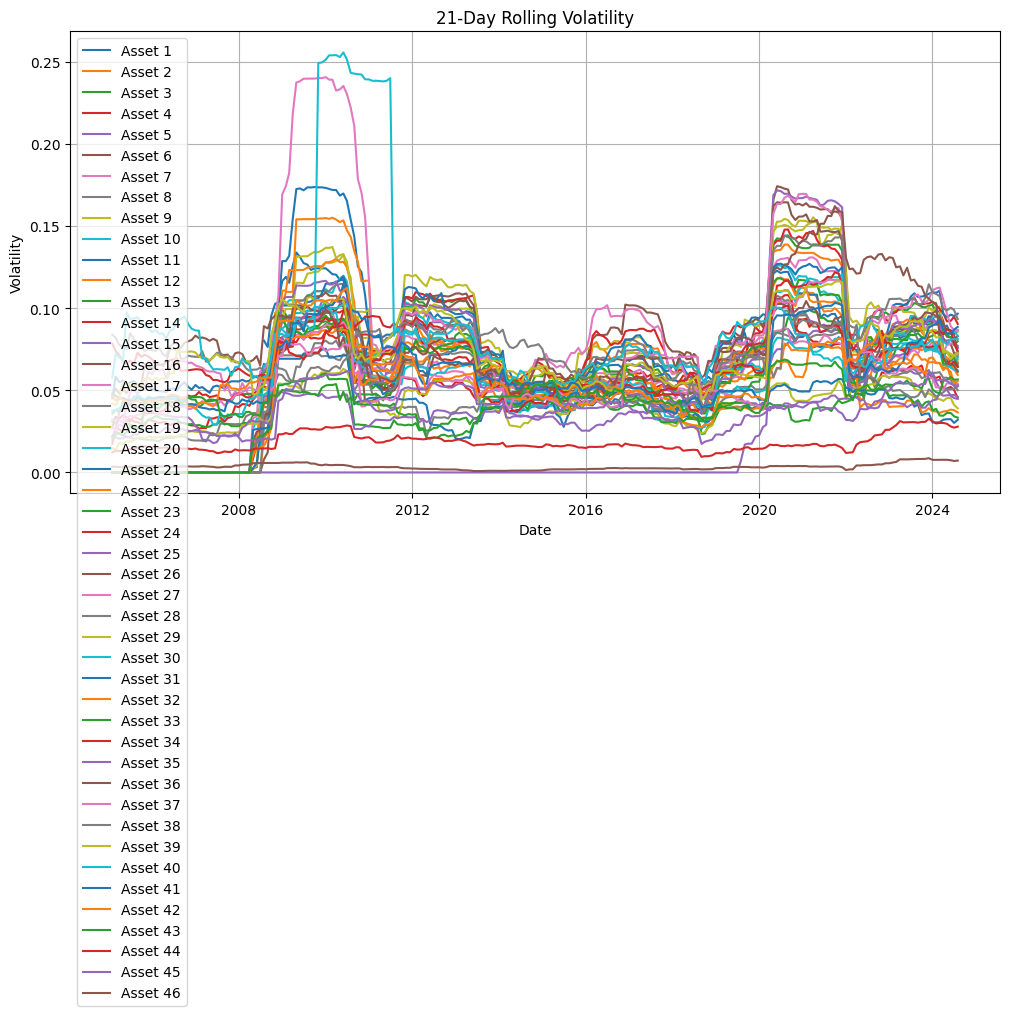

In [90]:
selected_assets = pred_binary_shifted  # Plot the first 3 assets for simplicity

plt.figure(figsize=(12, 6))
for asset in selected_assets:
    plt.plot(rolling_volatility.index, rolling_volatility[asset], label=asset)

plt.title("21-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid()
plt.show()

In [91]:
def calculate_rolling_var(df, window=20, confidence_level=0.05):
    var_df = df.rolling(window=window).apply(
        lambda x: np.percentile(x, confidence_level * 100), raw=True
    )
    return var_df

rolling_var = calculate_rolling_var(pred_binary_shifted, window=20, confidence_level=0.05)

<Axes: title={'center': 'Rolling VaR (95%) for Each Asset'}, xlabel='Date'>

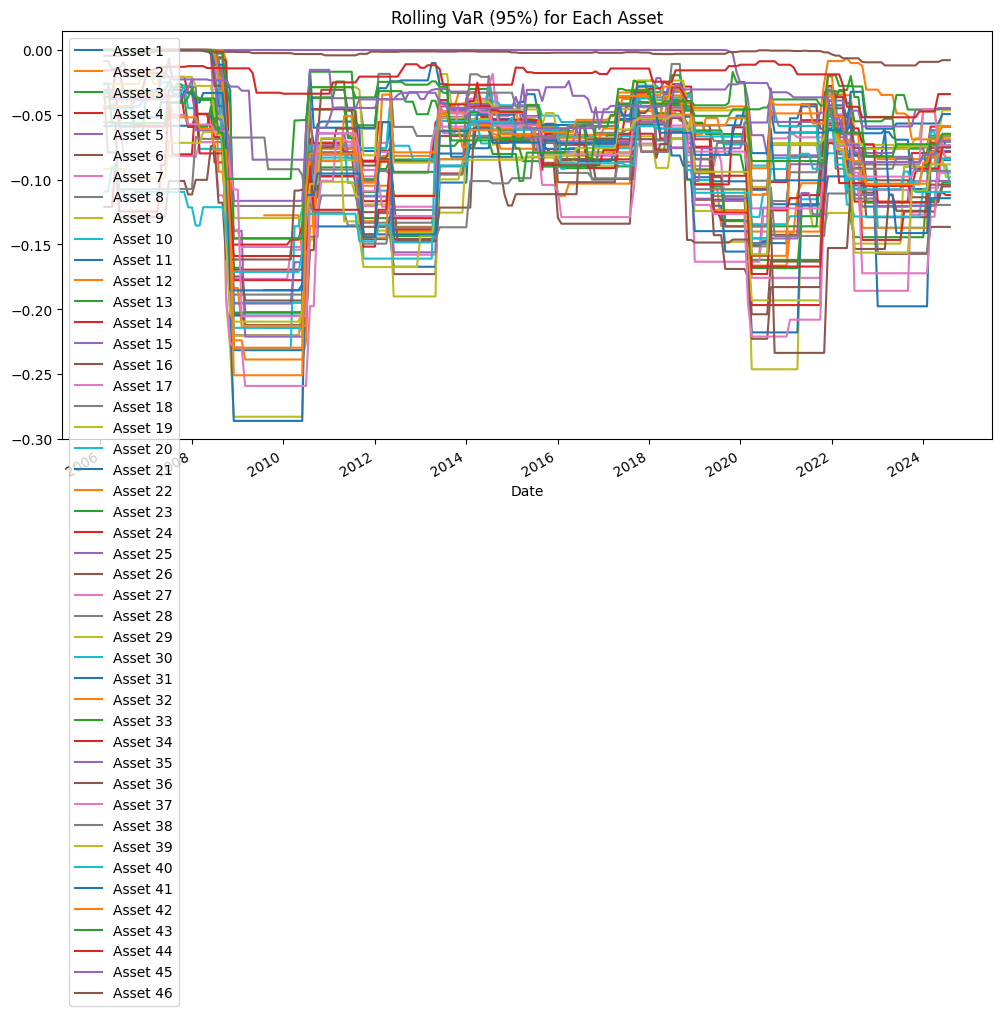

In [92]:
rolling_var.plot(figsize=(12, 6), title="Rolling VaR (95%) for Each Asset")

# Apply the Defensive Overlay dynamically

### Description：

The function dynamically applies a defensive overlay at the asset level based on three signals: rolling volatility, rolling VaR, and drawdown periods. Assets are categorized as “low risk” if they fall in the bottom 30% of volatility, satisfy a VaR threshold, or are not in a drawdown period. These low-risk assets remain untouched. For other assets, the function dynamically adjusts their weights based on risk signals, allocating a portion of their weight to cash while normalizing the portfolio weights.

In [93]:
def apply_dynamic_defensive_overlay(portfolio_weights, rolling_volatility, rolling_var, drawdown_period, 
                                     cash_allocation=0.3, volatility_threshold=0.3, var_threshold=0.3):
    """
    Dynamically adjusts portfolio weights based on rolling volatility, rolling VaR, and drawdown periods.

    Args:
        portfolio_weights (pd.DataFrame): Portfolio weights of assets.
        rolling_volatility (pd.DataFrame): Asset-specific rolling volatility.
        rolling_var (pd.DataFrame): Asset-specific rolling VaR.
        drawdown_period (pd.DataFrame): Boolean DataFrame indicating drawdown periods (True for drawdown).
        cash_allocation (float): Percentage of the weight allocated to cash during high risk.
        volatility_threshold (float): Percentile threshold for low/high volatility (e.g., 0.3 for bottom 30% or top 30%).
        var_threshold (float): Percentile threshold for low/high VaR (e.g., 0.3 for bottom 30% or top 30%).

    Returns:
        pd.DataFrame: Adjusted portfolio weights with defensive overlay applied dynamically.
    """
    # Create a DataFrame for adjusted weights
    adjusted_weights = portfolio_weights.copy()
    adjusted_weights['Cash'] = 0.0  # Add a cash column

    # Loop over dates and assets
    for date in adjusted_weights.index:
        # Filter historical data up to the current date
        past_vol = rolling_volatility[rolling_volatility.index < date]
        past_var = rolling_var[rolling_var.index < date]

        # Calculate percentiles for the current date and historical data
        vol_threshold_value_low = past_vol.quantile(volatility_threshold)
        vol_threshold_value_high = past_vol.quantile(1 - volatility_threshold)
        var_threshold_value_low = past_var.quantile(var_threshold)
        var_threshold_value_high = past_var.quantile(1 - var_threshold)

        # Identify low-risk assets
        low_risk_assets = []
        for asset in portfolio_weights.columns:
            if (rolling_volatility.loc[date, asset] <= vol_threshold_value_low[asset] and
                rolling_var.loc[date, asset] >= var_threshold_value_high[asset] and
                not drawdown_period.loc[date, asset]):
                low_risk_assets.append(asset)

        # Adjust weights for high-risk assets
        for asset in portfolio_weights.columns:
            if (rolling_volatility.loc[date, asset] > vol_threshold_value_high[asset] or
                rolling_var.loc[date, asset] < var_threshold_value_low[asset] or
                drawdown_period.loc[date, asset]):
                # Reduce weight for high-risk assets and allocate to cash
                adjusted_weights.loc[date, asset] *= (1 - cash_allocation)
                adjusted_weights.loc[date, 'Cash'] += cash_allocation / len(portfolio_weights.columns)

        # Normalize weights to ensure they sum to 1
        adjusted_weights.loc[date, :] /= adjusted_weights.loc[date, :].sum()

    return adjusted_weights


# Apply the updated defensive overlay function
adjusted_portfolio_asset_weight = apply_dynamic_defensive_overlay(
    portfolio_weights, rolling_volatility, rolling_var, drawdown_periods, 
    cash_allocation=0.3, volatility_threshold=0.3, var_threshold=0.3
)

1.	Inputs:
	- portfolio_weights: DataFrame containing portfolio weights for each asset.
	- rolling_volatility: DataFrame with rolling volatility values for each asset.
	- rolling_var: DataFrame with rolling VaR values for each asset.
	- drawdown_period: Boolean DataFrame indicating whether each asset is in a drawdown period.
	- cash_allocation: The fraction of the weight to allocate to cash for high-risk assets.
	- volatility_threshold: Threshold for low volatility classification (bottom 30% by default).
	- var_threshold: VaR threshold for low risk classification.
2.	Low-risk asset identification:
	- An asset is considered low risk if:
	- Its volatility is in the bottom 30% (<= rolling_volatility.quantile(volatility_threshold)).
	- Its VaR is above the specified threshold (> var_threshold).
	- It is not in a drawdown period (not drawdown_period).
3.	High-risk asset adjustment:
	- For assets not classified as low risk:
	- Reduce their weights by (1 - cash_allocation).
	- Allocate the reduced weight to cash evenly across all assets.
4.	Normalization:
	- Ensure that the total weights, including cash, sum to 1 for each date.

In [94]:
# Display the adjusted portfolio weights
adjusted_portfolio_asset_weight

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 38,Asset 39,Asset 40,Asset 41,Asset 42,Asset 43,Asset 44,Asset 45,Asset 46,Cash
Date,,,,,,,,,,,,,,,,,,,,,
2005-06-01,0.0000,0.0000,0.0000,0.0510,0.0000,0.0000,0.0000,0.0550,0.0000,0.0000,...,0.0673,0.0333,0.0421,0.0280,0.0490,0.0328,0.0275,0.0318,0.0254,0.1002
2005-07-01,0.0000,0.0000,0.0000,0.0495,0.0000,0.0000,0.0000,0.0562,0.0000,0.0000,...,0.0422,0.0339,0.0399,0.0253,0.0531,0.0387,0.0280,0.0326,0.0264,0.1086
2005-08-01,0.0000,0.0000,0.0000,0.0517,0.0000,0.0000,0.0000,0.0592,0.0000,0.0000,...,0.0424,0.0349,0.0474,0.0425,0.0548,0.0376,0.0269,0.0306,0.0377,0.1094
2005-09-01,0.0000,0.0000,0.0000,0.0503,0.0000,0.0000,0.0000,0.0585,0.0000,0.0000,...,0.0351,0.0463,0.0417,0.0225,0.0504,0.0399,0.0310,0.0354,0.0291,0.1171
2005-10-03,0.0000,0.0000,0.0000,0.0521,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0555,0.0502,0.0427,0.0221,0.0509,0.0586,0.0295,0.0321,0.0292,0.0933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,0.0217,0.0140,0.0323,0.0220,0.0152,0.0036,0.0245,0.0203,0.0205,0.0217,...,0.0039,0.0194,0.0215,0.0122,0.0159,0.0146,0.0070,0.0046,0.0088,0.1661
2024-05-01,0.0201,0.0127,0.0223,0.0242,0.0135,0.0051,0.0274,0.0195,0.0139,0.0260,...,0.0018,0.0179,0.0167,0.0140,0.0148,0.0174,0.0078,0.0054,0.0100,0.2528
2024-06-03,0.0286,0.0111,0.0358,0.0212,0.0116,0.0067,0.0268,0.0198,0.0100,0.0158,...,0.0000,0.0181,0.0248,0.0184,0.0133,0.0203,0.0061,0.0043,0.0079,0.2184


In [95]:
def calculate_portfolio_returns(weights_df, returns_df):
    """
    Calculate the daily portfolio returns by aligning dates, multiplying asset weights with their corresponding returns.

    Args:
        weights_df (pd.DataFrame): DataFrame containing portfolio weights (including 'Cash').
        returns_df (pd.DataFrame): DataFrame containing asset returns.

    Returns:
        pd.Series: Daily portfolio returns.
    """
    # Align the index (dates) of weights and returns DataFrames
    returns_df = returns_df.iloc[-len(weights_df):]

    # Remove the 'Cash' column from weights
    weights_no_cash = weights_df.drop(columns=['Cash'])

    # Ensure the weights and returns DataFrames align on columns (assets)
    weights_no_cash = weights_no_cash[returns_df.columns]

    # Calculate daily portfolio returns
    daily_portfolio_returns = np.sum(weights_no_cash * returns_df.values, axis=1)

    return daily_portfolio_returns

def calculate_cum_return(ret):
    res = []
    cum_sum = 1
    for i in range(len(ret)):
        cum_sum*=(1+ret[i])
        res.append(cum_sum)
    return res


monthly_returns = calculate_portfolio_returns(adjusted_portfolio_asset_weight, df)

In [96]:
def summary_statistics_annualized(returns, annual_factor=12):
    summary_statistics = pd.DataFrame(index=[0])
    summary_statistics['Mean'] = returns.mean()*annual_factor
    summary_statistics['Vol'] = returns.std()*np.sqrt(annual_factor)
    summary_statistics['Sharpe'] = (returns.mean()/returns.std())*np.sqrt(annual_factor)
    summary_statistics['Min'] = returns.min()
    summary_statistics['Max'] = returns.max()
    summary_statistics['Skewness'] = skew(returns)
    summary_statistics['Excess Kurtosis'] = kurtosis(returns)
    summary_statistics['VaR (0.05)'] = np.quantile(returns, 0.05)
    summary_statistics['CVaR (0.05)'] = returns[returns<=np.quantile(returns, 0.05)].mean()
    cumulative_returns = np.cumprod(1+returns)
    rolling_max = np.maximum.accumulate(cumulative_returns)
    drawdown = (cumulative_returns-rolling_max)/rolling_max
    max_drawdown = drawdown.min()
    summary_statistics['Max Drawdown'] = max_drawdown
    return summary_statistics


In [97]:
summary_statistics_annualized(monthly_returns)

,Mean,Vol,Sharpe,Min,Max,Skewness,Excess Kurtosis,VaR (0.05),CVaR (0.05),Max Drawdown
0,0.0878,0.1370,0.6408,-0.1531,0.1083,-0.6360,1.3691,-0.0574,-0.0915,-0.3603


<Axes: xlabel='Date'>

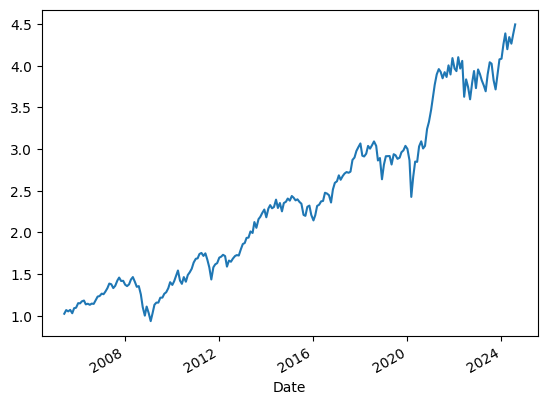

In [98]:
monthly_returns = pd.DataFrame(monthly_returns, columns = ['Return'])
monthly_returns['CumRet'] = calculate_cum_return(monthly_returns['Return'])
monthly_returns['CumRet'].plot()

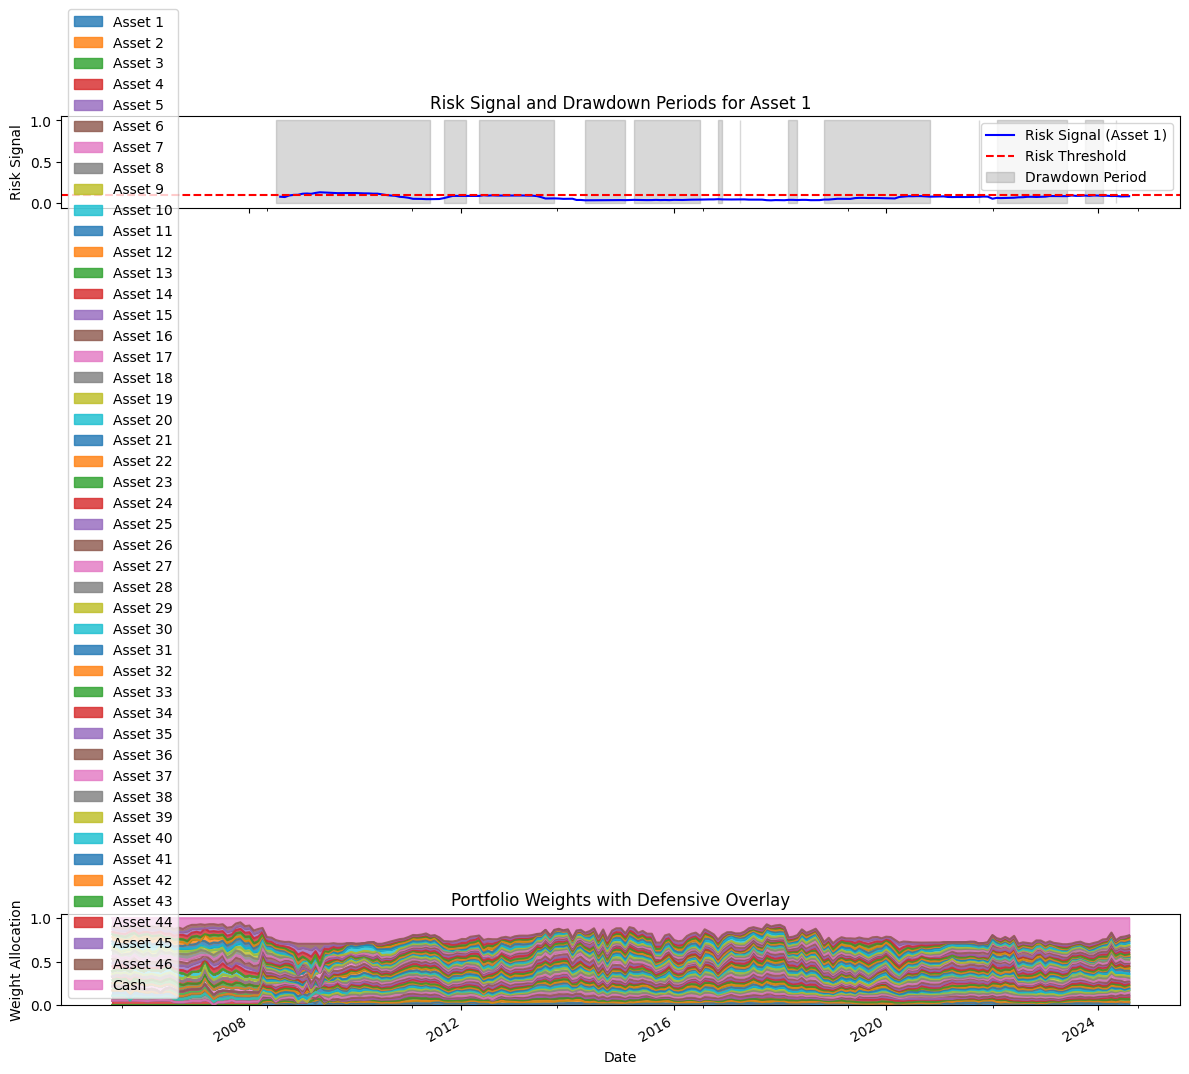

In [99]:
# Updated Visualization
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Example risk signal for Asset1
example_asset = 'Asset 1'

# Plot the risk signal and drawdown periods for the example asset
ax[0].plot(rolling_volatility[example_asset], label=f"Risk Signal ({example_asset})", color="blue")
ax[0].axhline(y=0.1, color="red", linestyle="--", label="Risk Threshold")
ax[0].fill_between(
    rolling_volatility.index,
    0,
    1,
    where=drawdown_periods[example_asset],
    color="gray",
    alpha=0.3,
    label="Drawdown Period"
)
ax[0].set_title(f"Risk Signal and Drawdown Periods for {example_asset}")
ax[0].set_ylabel("Risk Signal")
ax[0].legend()

# Plot adjusted portfolio weights as an area plot
adjusted_portfolio_asset_weight.plot.area(ax=ax[1], alpha=0.8)
ax[1].set_title("Portfolio Weights with Defensive Overlay")
ax[1].set_ylabel("Weight Allocation")
ax[1].set_xlabel("Date")

plt.tight_layout()
plt.show()

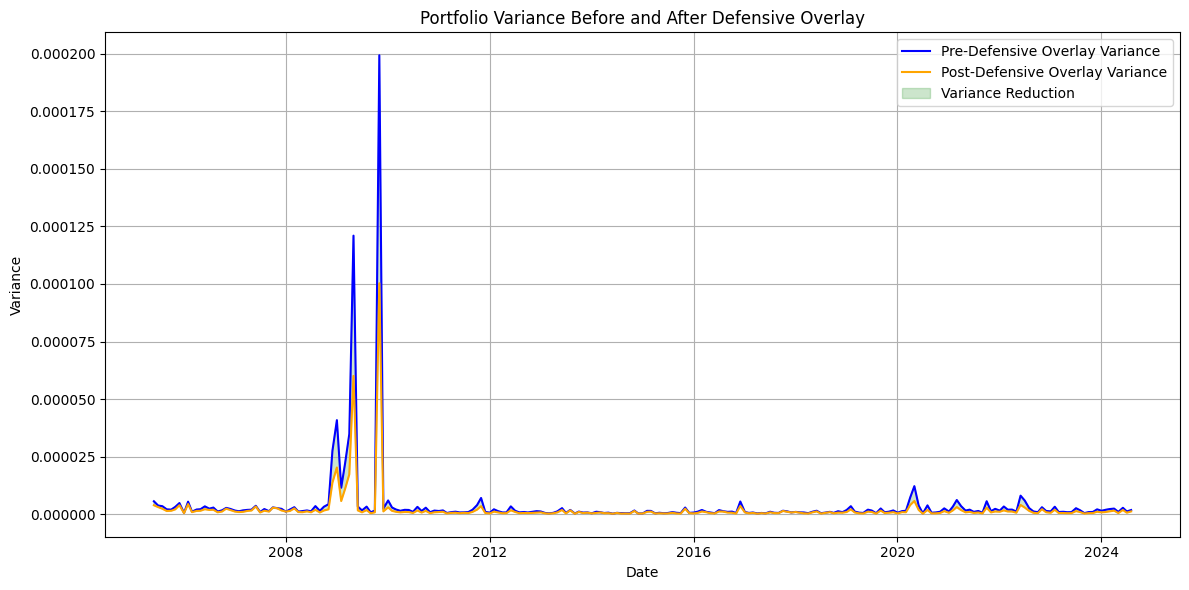

In [100]:
# Ensure variance calculations are based on asset returns
pre_defensive_variance = (df * portfolio_weights).var(axis=1).astype(float)
post_defensive_variance = (df * adjusted_portfolio_asset_weight.drop(columns="Cash")).var(axis=1).astype(float)

# Align indices to avoid mismatches
aligned_indices = pre_defensive_variance.index.intersection(post_defensive_variance.index)
pre_defensive_variance = pre_defensive_variance.loc[aligned_indices]
post_defensive_variance = post_defensive_variance.loc[aligned_indices]

# Convert data explicitly to numpy arrays for compatibility with fill_between
aligned_indices = aligned_indices.to_numpy()
pre_defensive_variance_np = pre_defensive_variance.to_numpy()
post_defensive_variance_np = post_defensive_variance.to_numpy()
where_condition_np = pre_defensive_variance_np > post_defensive_variance_np

# Re-plot with numpy arrays
plt.figure(figsize=(12, 6))
plt.plot(aligned_indices, pre_defensive_variance_np, label="Pre-Defensive Overlay Variance", color="blue")
plt.plot(aligned_indices, post_defensive_variance_np, label="Post-Defensive Overlay Variance", color="orange")
plt.fill_between(
    aligned_indices, 
    pre_defensive_variance_np, 
    post_defensive_variance_np, 
    where=where_condition_np, 
    color="green", alpha=0.2, label="Variance Reduction"
)
plt.title("Portfolio Variance Before and After Defensive Overlay")
plt.xlabel("Date")
plt.ylabel("Variance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()